In [1]:

import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:/Users/Yash/Downloads/Bodyfat.csv")

In [3]:
df.shape

(100, 10)

In [4]:
df.dtypes

Bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Ankle      float64
Biceps     float64
Wrist      float64
dtype: object

In [5]:
df.drop_duplicates(inplace = True)

In [109]:
data = df.corr()

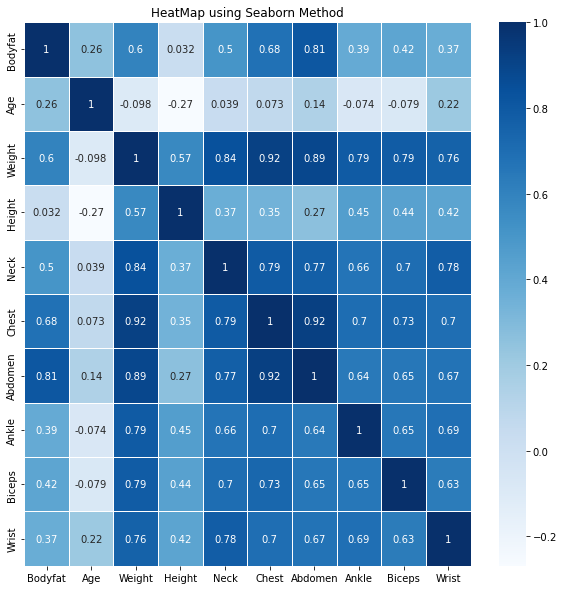

In [110]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( data,linewidth = 1, annot=True,cmap = plt.cm.Blues)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

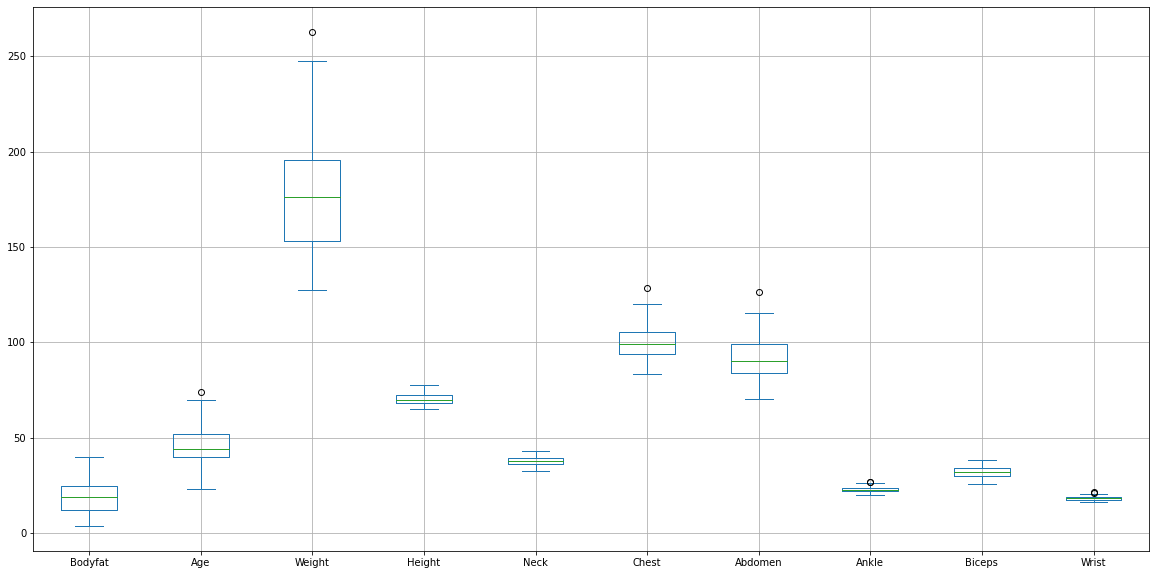

In [111]:
df.plot.box(grid = True,figsize = (20,10))
plt.show()

In [112]:
df_x = df.iloc[:,1:10]
df_y = df.iloc[:,0]

In [113]:
import sklearn 
from sklearn.model_selection import train_test_split

In [114]:
df_x_train,df_x_test,df_y_train,df_y_test = train_test_split(df_x,df_y,test_size = .2,random_state = 100)  

In [115]:
df_x_train.shape,df_x_test.shape,df_y_train.shape,df_y_test.shape

((80, 9), (20, 9), (80,), (20,))

In [116]:
from sklearn import linear_model 

In [117]:
lm = linear_model.LinearRegression()

In [118]:
lm.fit(df_x_train,df_y_train)   #training the model  for the train dataset 

LinearRegression()

In [119]:
pre_x_test = lm.predict(df_x_test) 

In [120]:
pre_x_test

array([15.61357879,  8.00941333, 37.22892241, 16.76355573, 24.89178728,
       40.38767915,  9.81598539, 24.38375022, 20.68969316, 16.03153843,
       16.42896345, 11.95189825, 21.67175592, 16.26847028, 27.62582338,
       31.81274325, 17.06191268, 23.98188577, 18.35150001, 21.08249043])

In [121]:
lm.coef_   

array([ 0.08656551, -0.10109566,  0.05100349, -0.09685021, -0.08898081,
        1.02727645,  0.57267809,  0.3026572 , -2.72038021])

In [122]:
lm.intercept_ 

-25.686073601411866

In [123]:
rsq = lm.score(df_x_train,df_y_train)
rsq

0.7519148537052158

In [124]:
ajrsq = 1-(((1-rsq)*(80-1))/(80-9-1))
ajrsq

0.7200181920387436

In [125]:
from sklearn.linear_model import Lasso

In [126]:
l = Lasso()

In [127]:
l.fit(df_x_train,df_y_train)

Lasso()

In [128]:
l_x_test = l.predict(df_x_test) 

In [129]:
l_x_test

array([14.97995775,  8.00109067, 40.46472755, 16.25528279, 22.50633313,
       37.17929569, 11.19708793, 23.71115711, 19.69529676, 15.71427185,
       17.85386174, 11.02822287, 22.93385137, 14.62533411, 23.85807471,
       29.71131598, 14.76812506, 23.94074627, 18.4052948 , 21.19734973])

In [130]:
l.coef_  

array([ 0.00654472, -0.12892767, -0.        , -0.        ,  0.        ,
        0.95156299,  0.        ,  0.        , -0.        ])

In [131]:
l.intercept_ 

-46.04128942229764

In [132]:
data_f = pd.DataFrame({'importance':list(l.coef_  ), "columns":list(df_x)})
data_f

,importance,columns
0,0.006545,Age
1,-0.128928,Weight
2,-0.000000,Height
3,-0.000000,Neck
4,0.000000,Chest
5,0.951563,Abdomen
6,0.000000,Ankle
7,0.000000,Biceps
8,-0.000000,Wrist


In [133]:
rsq1 = l.score(df_x_train,df_y_train)
rsq1

0.704940658393691

In [134]:
ajrsq1 = 1-(((1-rsq1)*(80-1))/(80-9-1))
ajrsq1

0.6670044573300227

In [135]:
from sklearn.linear_model import Ridge

In [136]:
rm = Ridge()

In [137]:
rm.fit(df_x_train,df_y_train)

Ridge()

In [138]:
r_x_test = rm.predict(df_x_test) 

In [139]:
rm.coef_  

array([ 0.08337568, -0.09965797,  0.03886288, -0.12544942, -0.08684894,
        1.02386924,  0.53575131,  0.29593143, -2.58365098])

In [140]:
data_r = pd.DataFrame({"importance":list(rm.coef_), "columns":list(df_x)})

In [141]:
data_r

,importance,columns
0,0.083376,Age
1,-0.099658,Weight
2,0.038863,Height
3,-0.125449,Neck
4,-0.086849,Chest
5,1.023869,Abdomen
6,0.535751,Ankle
7,0.295931,Biceps
8,-2.583651,Wrist


In [142]:
rsq2 = rm.score(df_x_train,df_y_train)
rsq2

0.7518316321791766

In [143]:
ajrsq2 = 1-(((1-rsq2)*(80-1))/(80-9-1))
ajrsq2

0.7199242706022135

In [153]:
list1 = ["Linear","Lasso","ridge"]
list2 = [rsq,rsq1,rsq2]
list3 = [ajrsq,ajrsq1,ajrsq2]
final = pd.DataFrame({'modelname':list1,"R-Square":list2,"Adj_R-Square":list3})
final


,modelname,R-Square,Adj_R-Square
0,Linear,0.751915,0.720018
1,Lasso,0.704941,0.667004
2,ridge,0.751832,0.719924


# dimension reduction

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
pca = PCA()

In [7]:
x = df.iloc[:,1:10]
y = df.iloc[:,0]

In [8]:
scaler.fit(x)

StandardScaler()

In [9]:
s1 = scaler.transform(x)

In [10]:
pca1 = pca.fit(s1)

In [11]:
pca1_t = pca.transform(s1)

In [13]:
pca.explained_variance_ratio_

array([0.63767721, 0.14439574, 0.07353475, 0.04298671, 0.03867617,
       0.03494927, 0.01780336, 0.00762501, 0.00235176])

In [12]:
pca.explained_variance_ratio_.sum()

1.0

In [17]:
pca1d = pd.DataFrame(pca1_t[:,[0,1,2,3,4,5,6,7,8]])   #multi corelinearity is destroyed acquire by pca
pca1d

,0,1,2,3,4,5,6,7,8
0,5.474485,0.358878,0.341100,-0.175371,-0.623644,0.396772,-0.199273,-0.350622,-0.012723
1,0.034121,1.284403,0.122882,-0.599217,-1.371987,0.492269,0.373716,0.014769,0.248528
2,-1.265729,0.317179,0.287236,-0.746531,-0.545011,1.073025,-0.084263,0.137068,0.204991
3,-2.089709,1.379530,1.475772,-0.344155,0.409219,-0.155590,0.236289,-0.218665,0.113125
4,-0.707744,-0.223792,0.195648,0.570080,-0.860770,-0.121721,-0.078751,-0.214425,-0.054866
...,...,...,...,...,...,...,...,...,...
95,-0.602053,0.311474,-1.001929,0.384761,-0.604387,0.044360,-0.029976,-0.255996,-0.136386
96,0.800760,0.972499,-0.513125,0.471113,-0.017223,0.845012,-0.457463,-0.802817,0.219033
97,1.154252,0.300360,0.456456,-1.407217,0.319487,-1.323177,0.327444,-0.205456,0.031177
98,3.153176,1.059029,1.832854,-0.088571,-0.253614,0.132123,-0.110524,0.039930,-0.024983


In [19]:
from sklearn import linear_model 
lm = linear_model.LinearRegression()

In [21]:
lm.fit(pca1d,y)

LinearRegression()

In [22]:
predl  = lm.predict(pca1d)

In [24]:
rsqd = lm.score(pca1d,y)
rsqd

0.7574718145674211